<h2>Let's Start<h2>

Lets first discuss what we are given and what we have to predict.
About our dataset :

We have in our training data :- 
1. date - every date of items sold
2. date_block_num - this number given to every month
3. shop_id - unique number of every shop
4. item_id - unique number of every item
5. item_price - price of every item
6. item_cnt_day - number of items sold on a particular day 

We have in our testing data :- 
1. ID - unique for every (shop_id,item_id) pair.
2. shop_id - unique number of every shop
3. item_id - unique number of every item

Now what we have to predict ?
we have to predict how many items of a type from each shop  will be sold in a whole month.
Our submission should have ID and item_cnt_month columns.

What is our approach?
our approach will be simple.
Our features will be number of items sold in month from a shop excluding last month data because that will our labels, that we help our model learn to predict next sequence. And for testing will use number of items sold in month from a shop excluding first month like this dimension of our data remains same. Our model will predict the next sequence and that we will be our results. This is pretty simple approach but its good for start. Please try some different approaches also. 
And please let me know if I did something wrong. If you like it please vote it up.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ilariongarbuzov","key":"c35c23298b2b0fab9258f79545194113"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3200           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      23933            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5461            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        383           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1711            True  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       7296   

In [ ]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 55.4MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 3.18MB/s]
  0% 0.00/468k [00:00<?, ?B/s]
100% 468k/468k [00:00<00:00, 105MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 3.04MB/s]
 68% 9.00M/13.3M [00:00<00:00, 24.8MB/s]
100% 13.3M/13.3M [00:00<00:00, 33.6MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 137MB/s]


In [ ]:
!unzip -q "../content/items.csv.zip"
!unzip -q "../content/sales_train.csv.zip"
!unzip -q "../content/sample_submission.csv.zip"
!unzip -q "../content/test.csv.zip"

<h3>I would appreciate if you could upvote this kernel.<h3>

First of all as we know import required libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#loading data 
os.listdir('../content')
sales_data = pd.read_csv('../content/sales_train.csv')
item_cat = pd.read_csv('../content/item_categories.csv')
items = pd.read_csv('../content/items.csv')
shops = pd.read_csv('../content/shops.csv')
sample_submission = pd.read_csv('../content/sample_submission.csv')
test_data = pd.read_csv('../content/test.csv')


In [ ]:
sales_data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [ ]:
test_data.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [ ]:
sample_submission.head(3)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5


In [ ]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)
    
    

In [ ]:
#Litle bit of exploration of data

print("=============================Sales Data=============================")
basic_eda(sales_data)
print("=============================Test data=============================")
basic_eda(test_data)
print("=============================Item Categories=============================")
basic_eda(item_cat)
print("=============================Items=============================")
basic_eda(items)
print("=============================Shops=============================")
basic_eda(shops)
print("=============================Sample Submission=============================")
basic_eda(sample_submission)



=============================Sales Data=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------

In [ ]:
#we can see that 'date' column in sales_data is an object but if we want to manipulate 
#it or want to work on it someway then we have convert it on datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'],format = '%d.%m.%Y')

In [ ]:
sales_data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [ ]:
#now we will create a pivot tabel by going so we get our data in desired form 
#we want get total count value of an item over the whole month for a shop 
# That why we made shop_id and item_id our indices and date_block_num our column 
# the value we want is item_cnt_day and used sum as aggregating function 
dataset = sales_data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [ ]:
dataset.head(3)

item_cnt_day                        ...                        
date_block_num            0   1  2  3  4  5  6  7   ... 26 27 28 29 30 31 32 33
shop_id item_id                                     ...                        
0       30                 0  31  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        31                 0  11  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        32                 6  10  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0

[3 rows x 34 columns]

In [ ]:
# lets reset our indices, so that data should be in way we can easily manipulate
dataset.reset_index(inplace = True)

In [ ]:
# lets check on our pivot table
dataset.head(3)

shop_id item_id item_cnt_day               ...                     
date_block_num                            0   1  2  3  4  ... 27 28 29 30 31 32 33
0                    0      30            0  31  0  0  0  ...  0  0  0  0  0  0  0
1                    0      31            0  11  0  0  0  ...  0  0  0  0  0  0  0
2                    0      32            6  10  0  0  0  ...  0  0  0  0  0  0  0

[3 rows x 36 columns]

In [ ]:
# Now we will merge our pivot table with the test_data because we want to keep the data of items we have
# predict
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# lets fill all NaN values with 0
dataset.fillna(0,inplace = True)
# lets check our data now 
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# we will drop shop_id and item_id because we do not need them
# we are teaching our model how to generate the next sequence 
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [ ]:
# importing libraries required for our model
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# our defining our model 
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
214200/214200 [==============================] - 4s 18us/step - loss: 29.5166 - mean_squared_error: 29.5166
Epoch 2/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.3821 - mean_squared_error: 29.3821
Epoch 3/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.3068 - mean_squared_error: 29.3068
Epoch 4/10
214200/214200 [==============================] - 4s 16us/step - loss: 29.3056 - mean_squared_error: 29.3056
Epoch 5/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.3229 - mean_squared_error: 29.3229
Epoch 6/10
214200/214200 [==============================] - 4s 16us/step - loss: 29.2662 - mean_squared_error: 29.2662
Epoch 7/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.2588 - mean_squared_error: 29.2588
Epoch 8/10
214200/214200 [==============================] - 4s 16us/step - loss: 29.2121 - mean_squared_error: 29.2121
Epoch 9/10
214200/214200 [======================

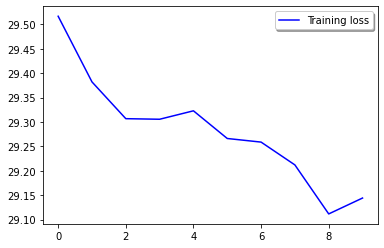

In [ ]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
# creating submission file 
submission_pfs = model_lstm.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('sub_pfs.csv',index = False)


In [ ]:
submission.head(3)

,ID,item_cnt_month
0,0,0.454653
1,1,0.118996
2,2,0.779819


In [ ]:
submission.shape, test_data.shape

((214200, 2), (214200, 3))

In [ ]:
# MLP for Time Series Forecasting (Multilayer Perceptron )
adam = optimizers.Adam()

model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.4))
model_mlp.add(Dense(1))

model_mlp.compile(loss='mse', optimizer=adam, metrics = ['mean_squared_error'])
model_mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               3400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_mlp = my_model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
214200/214200 [==============================] - 4s 18us/step - loss: 29.0010 - mean_squared_error: 29.0010
Epoch 2/10
214200/214200 [==============================] - 4s 17us/step - loss: 28.8804 - mean_squared_error: 28.8804
Epoch 3/10
214200/214200 [==============================] - 4s 17us/step - loss: 28.9337 - mean_squared_error: 28.9337
Epoch 4/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.0896 - mean_squared_error: 29.0896
Epoch 5/10
214200/214200 [==============================] - 4s 17us/step - loss: 28.8743 - mean_squared_error: 28.8743
Epoch 6/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.0123 - mean_squared_error: 29.0123
Epoch 7/10
214200/214200 [==============================] - 4s 17us/step - loss: 28.8683 - mean_squared_error: 28.8683
Epoch 8/10
214200/214200 [==============================] - 4s 17us/step - loss: 28.8743 - mean_squared_error: 28.8743
Epoch 9/10
214200/214200 [======================

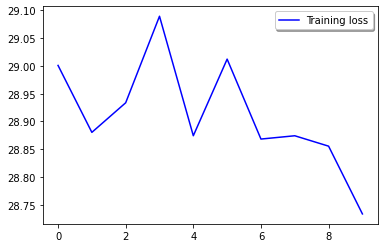

In [ ]:
plt.plot(history_mlp.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#CNN for Time Series Forecasting

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=adam)
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 32, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                51250     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 51,493
Trainable params: 51,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_history = model_cnn.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
 - 23s - loss: 33.3237
Epoch 2/10
 - 18s - loss: 29.3110
Epoch 3/10
 - 18s - loss: 26.3088
Epoch 4/10
 - 18s - loss: 22.7769
Epoch 5/10
 - 18s - loss: 26.9746
Epoch 6/10
 - 18s - loss: 25.9945
Epoch 7/10
 - 18s - loss: 28.7761
Epoch 8/10
 - 18s - loss: 27.4702
Epoch 9/10
 - 18s - loss: 26.1506
Epoch 10/10
 - 18s - loss: 26.8741


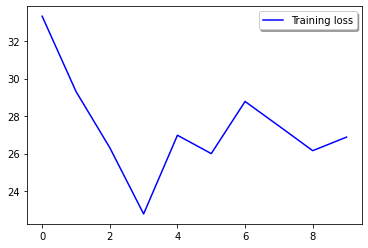

In [ ]:
plt.plot(cnn_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#CNN-LSTM for Time Series Forecasting

#Reshape from [samples, timesteps, features] into [samples, subsequences, timesteps, features]

subsequences = 3
timesteps = X_train.shape[1]//subsequences
X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)


Train set shape (214200, 3, 11, 1)


In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=adam)
model_cnn_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, None, 11, 64)      128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 5, 64)       0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 320)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                74200     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 74,379
Trainable params: 74,379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train, epochs=10, verbose=2)

Epoch 1/10
 - 57s - loss: 23.7979
Epoch 2/10
 - 57s - loss: 26.2191
Epoch 3/10
 - 57s - loss: 27.6563
Epoch 4/10
 - 56s - loss: 24.8155
Epoch 5/10
 - 56s - loss: 18.7879
Epoch 6/10
 - 56s - loss: 24.0268
Epoch 7/10
 - 57s - loss: 21.8233
Epoch 8/10
 - 59s - loss: 22.4467
Epoch 9/10
 - 59s - loss: 20.4799
Epoch 10/10
 - 61s - loss: 25.3111


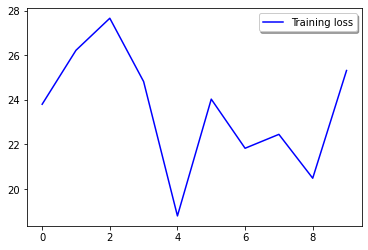

In [ ]:
plt.plot(cnn_lstm_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

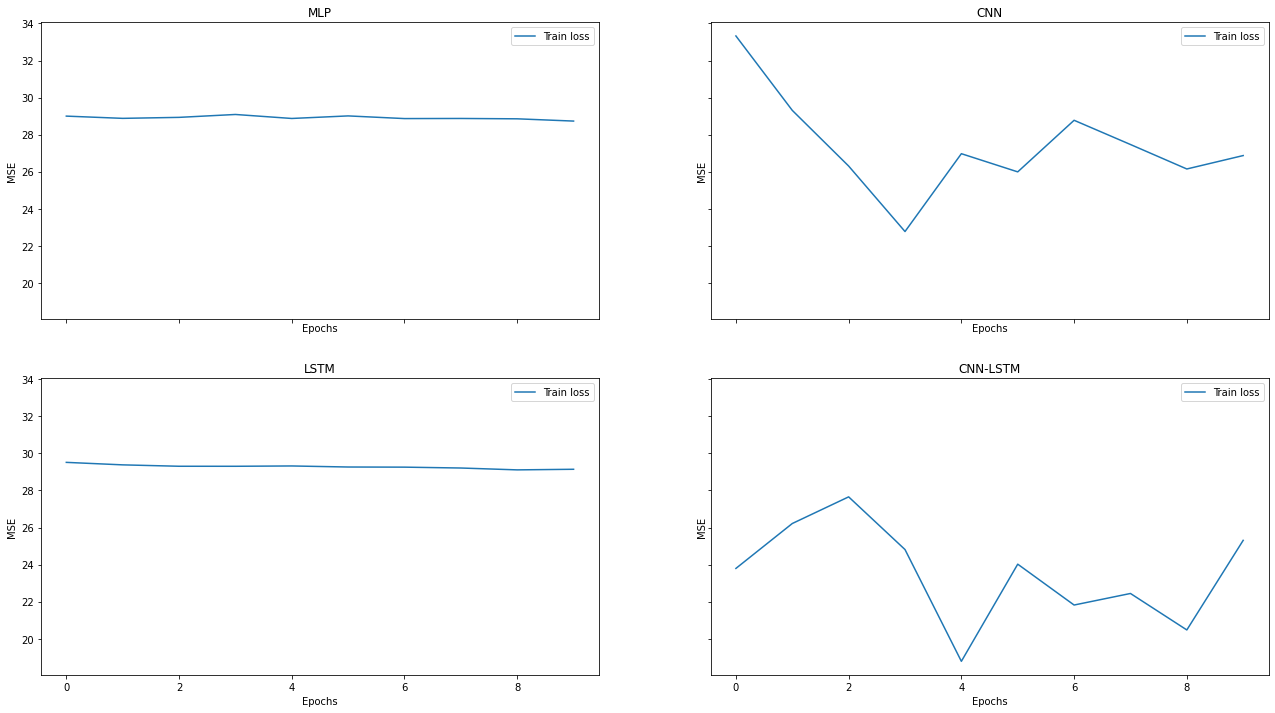

In [ ]:
#Comparing models

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(history_mlp.history['loss'], label='Train loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(history_lstm.history['loss'], label='Train loss')
ax3.legend(loc='best')
ax3.set_title('LSTM')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

ax4.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax4.legend(loc='best')
ax4.set_title('CNN-LSTM')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('MSE')

plt.show()